In [43]:
from data_ingest import read_csv
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2

pd.options.display.float_format = '{:.2f}'.format

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [44]:
df = read_csv('data_source\daily_forex_rates.csv')
df.head()

,currency,base_currency,currency_name,exchange_rate,date
0,ZWL,EUR,Zimbabwean Dollar,335.69,2025-02-13
1,GHS,EUR,Ghanaian Cedi,16.08,2025-02-13
2,HRK,EUR,Croatian Kuna,7.54,2025-02-13
3,HNL,EUR,Honduran Lempira,26.64,2025-02-13
4,HKD,EUR,Hong Kong Dollar,8.12,2025-02-13


In [45]:
def clean_data(df):
    df = df.astype({'currency': 'category'})
    df = df.astype({'base_currency': 'category', 'currency_name': 'category'})
    df = df.astype({'date': 'datetime64[ns]'})
    return df


df = clean_data(df)



In [46]:
from EDA_src.data_summary import describe_dataframe
describe_dataframe(df)



DataFrame Description:
       exchange_rate                           date
count      402286.00                         402286
mean         6963.82  2019-11-10 10:09:53.380828672
min             0.00            2004-08-30 00:00:00
25%             2.59            2017-03-07 00:00:00
50%            17.48            2020-03-10 00:00:00
75%           156.47            2023-03-22 00:00:00
max       4881841.00            2025-02-13 00:00:00
std        143639.65                            NaN


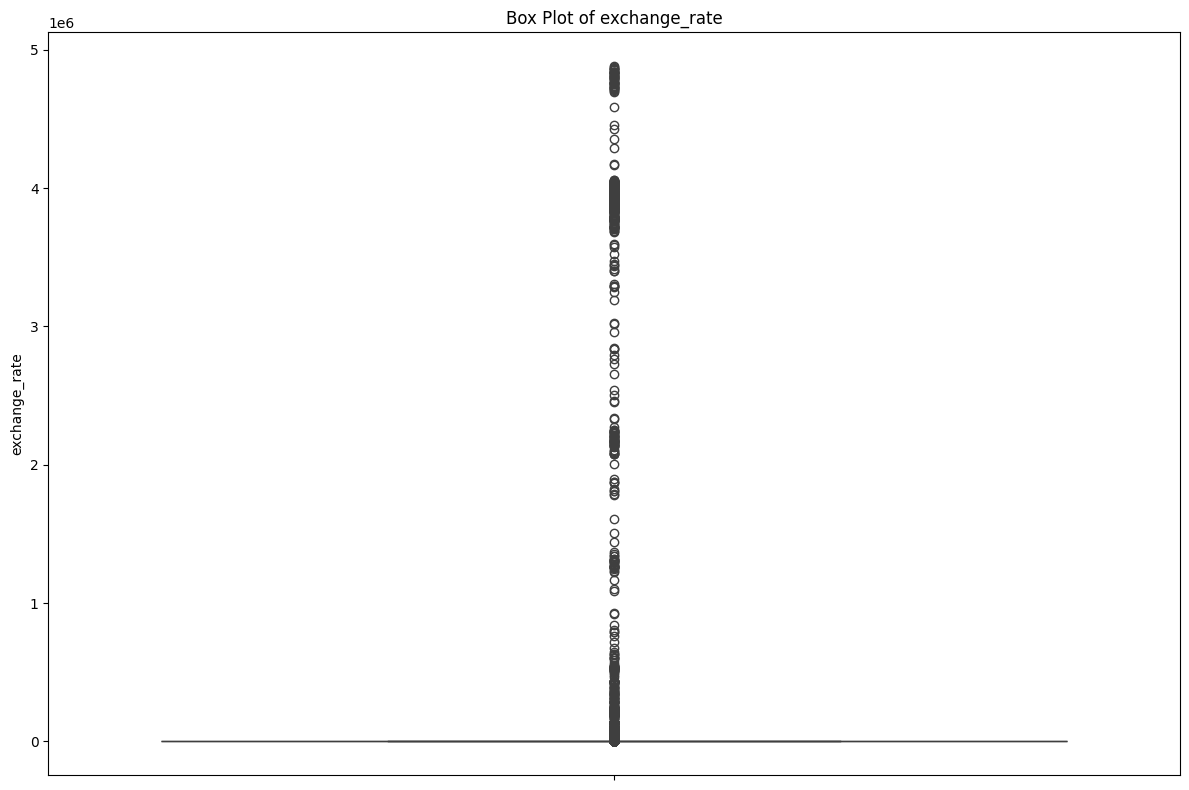

In [47]:
from EDA_src.outliers_check import subplot_boxplot

subplot_boxplot(df)

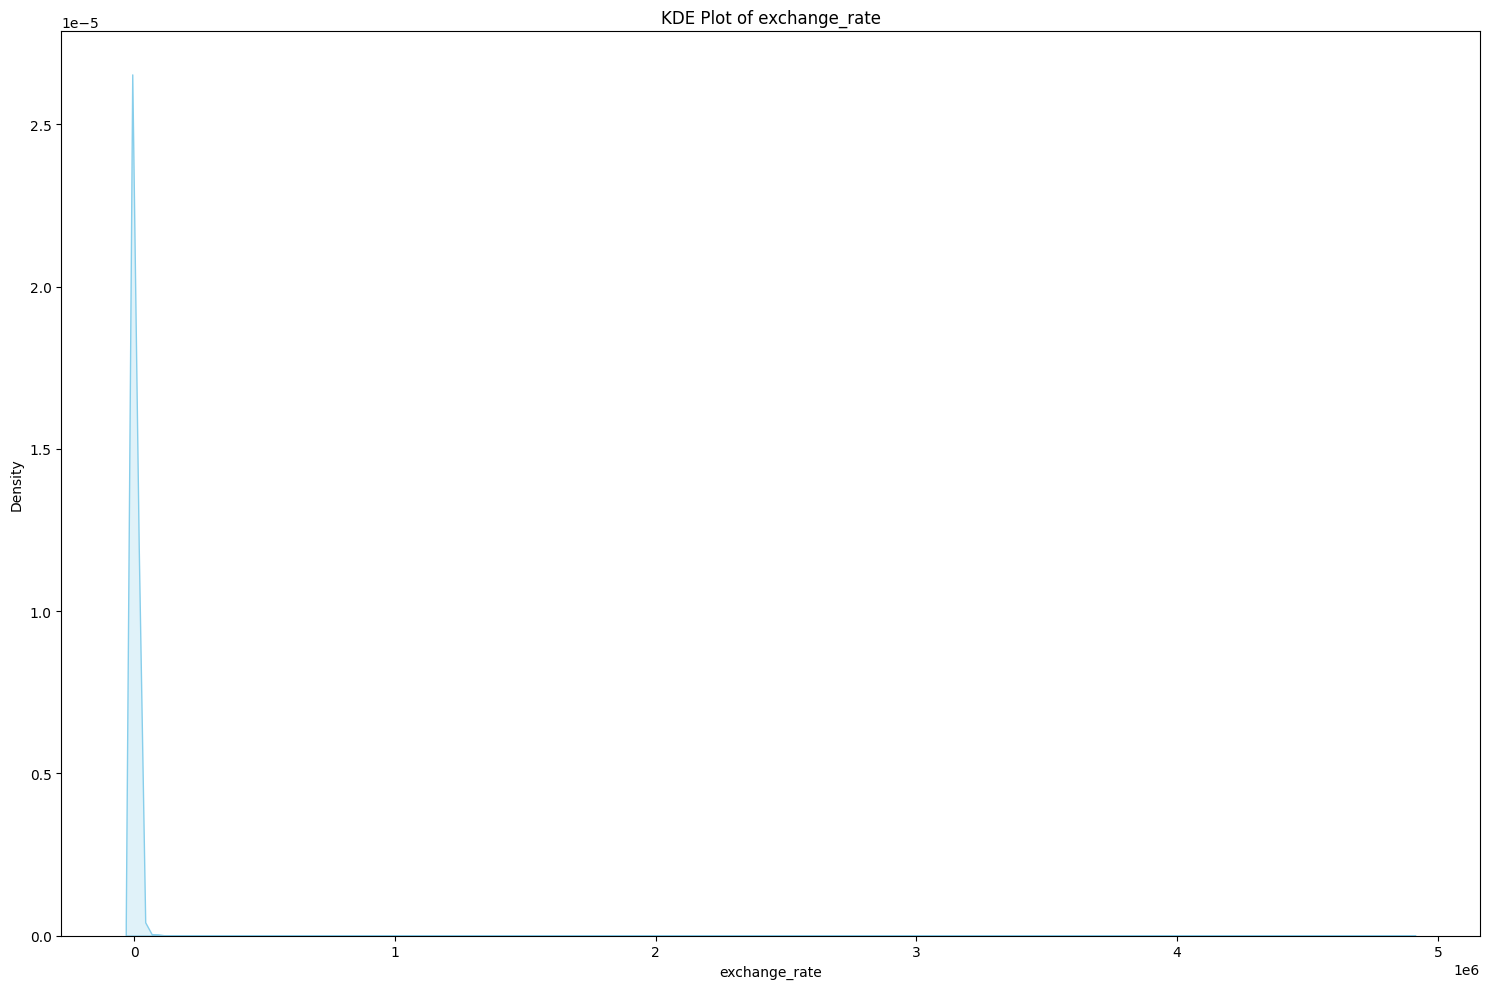

In [48]:
from EDA_src.data_distribution import plot_histograms

plot_histograms(df)

In [50]:
# describe dataset is different percentiles

df.describe(percentiles=[.01, .05, .1, .25, .5, .75, .9, .95, .99])

,exchange_rate,date
count,402286.00,402286
mean,6963.82,2019-11-10 10:09:53.380828672
min,0.00,2004-08-30 00:00:00
1%,0.04,2007-02-26 00:00:00
5%,0.84,2014-03-13 00:00:00
10%,1.10,2015-05-27 00:00:00
25%,2.59,2017-03-07 00:00:00
50%,17.48,2020-03-10 00:00:00
75%,156.47,2023-03-22 00:00:00
90%,2516.20,2024-06-23 00:00:00


In [51]:
nth_percentile = 0.80
df_filtered = df[df['exchange_rate'] <= df['exchange_rate'].quantile(nth_percentile)]
df_filtered

,currency,base_currency,currency_name,exchange_rate,date
0,ZWL,EUR,Zimbabwean Dollar,335.69,2025-02-13
1,GHS,EUR,Ghanaian Cedi,16.08,2025-02-13
2,HRK,EUR,Croatian Kuna,7.54,2025-02-13
3,HNL,EUR,Honduran Lempira,26.64,2025-02-13
4,HKD,EUR,Hong Kong Dollar,8.12,2025-02-13
...,...,...,...,...,...
402281,JPY,EUR,Japanese Yen,133.35,2004-09-01
402282,CAD,EUR,Canadian Dollar,1.60,2004-08-31
402283,JPY,EUR,Japanese Yen,132.85,2004-08-31
402284,AUD,EUR,Australian Dollar,1.73,2004-08-31


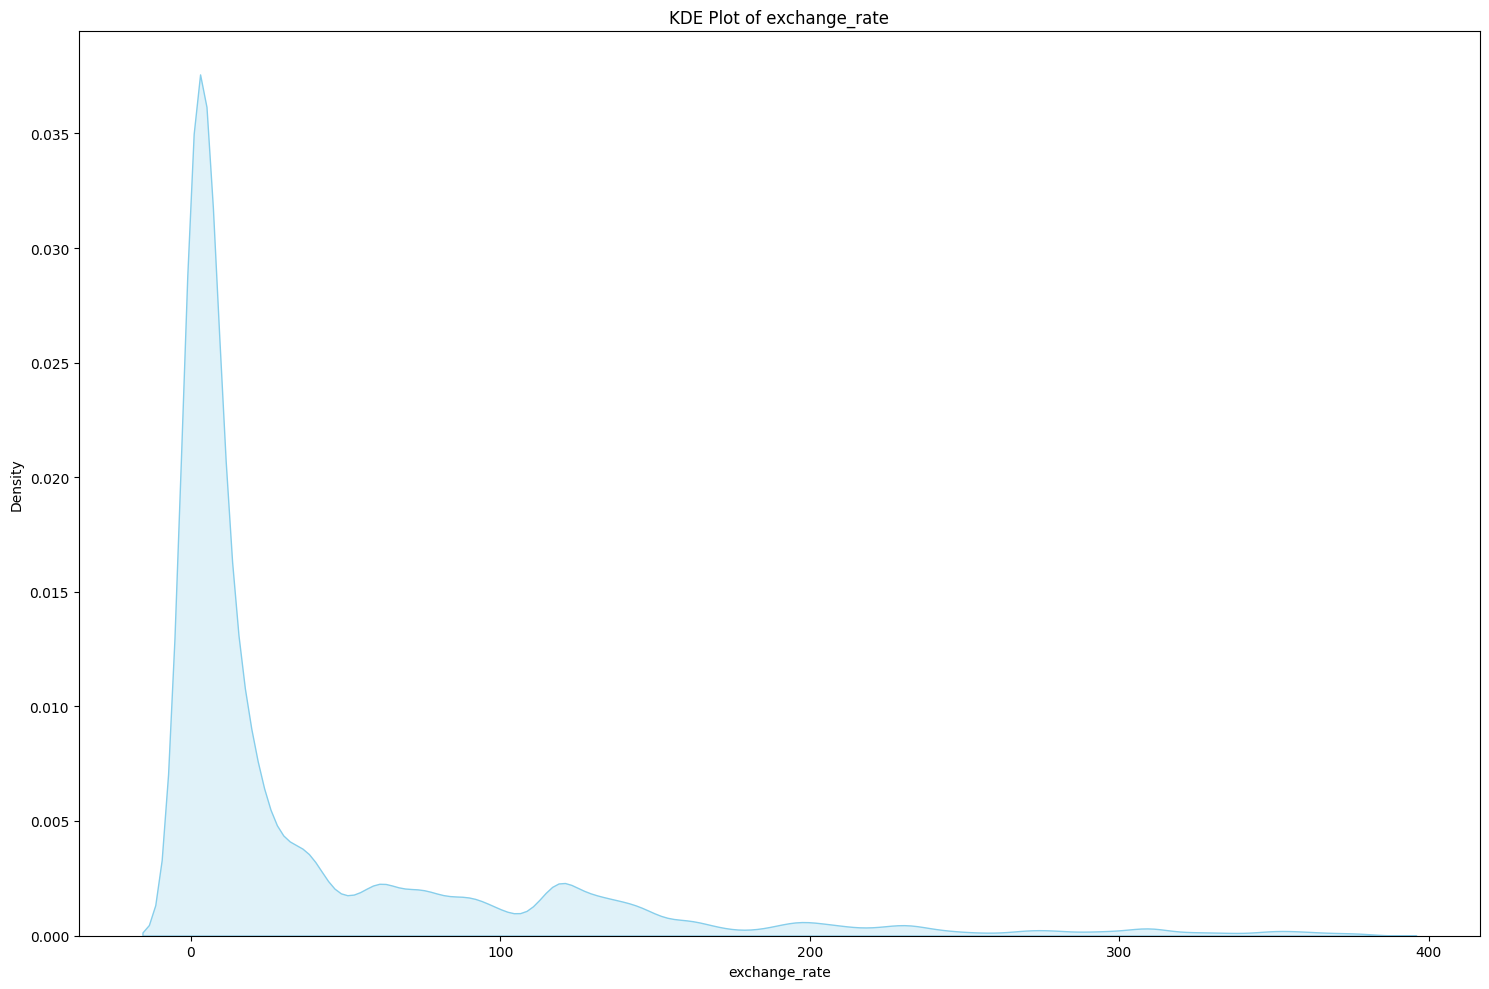

In [52]:
plot_histograms(df_filtered)

In [53]:
from preprocessing_steps.feature_extraction import temporal_features

temporal_features(df_filtered, 'date')
df_filtered.head()

,currency,base_currency,currency_name,exchange_rate,date,year,month,day,quarter,day_of_week,is_weekend
0,ZWL,EUR,Zimbabwean Dollar,335.69,2025-02-13,2025,2,13,1,3,False
1,GHS,EUR,Ghanaian Cedi,16.08,2025-02-13,2025,2,13,1,3,False
2,HRK,EUR,Croatian Kuna,7.54,2025-02-13,2025,2,13,1,3,False
3,HNL,EUR,Honduran Lempira,26.64,2025-02-13,2025,2,13,1,3,False
4,HKD,EUR,Hong Kong Dollar,8.12,2025-02-13,2025,2,13,1,3,False


In [54]:
df_filtered.describe(include=['category'])
# df_filtered.describe(include=['number'])

,currency,base_currency,currency_name
count,321829,321829,321078
unique,137,1,135
top,AUD,EUR,Australian Dollar
freq,5473,321829,5473


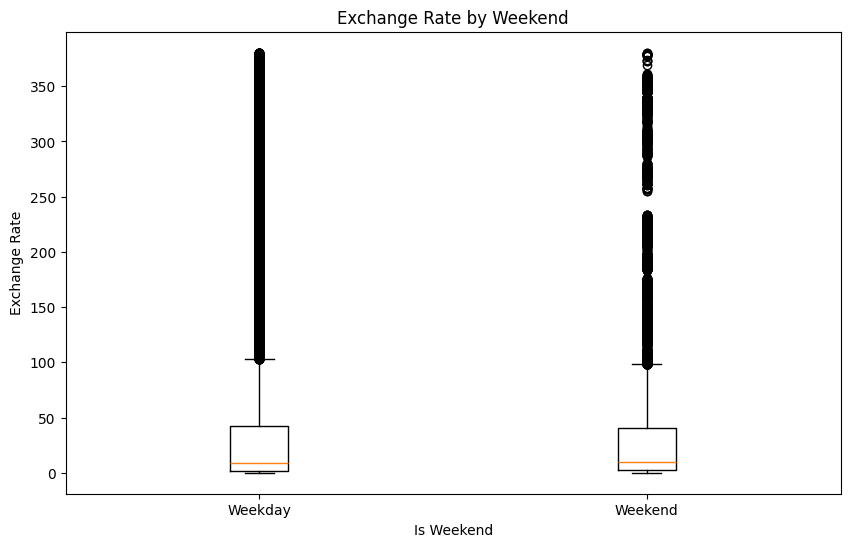

In [55]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.boxplot([df_filtered[df_filtered['is_weekend'] == False]['exchange_rate'],
             df_filtered[df_filtered['is_weekend'] == True]['exchange_rate']],
            labels=['Weekday', 'Weekend'])

plt.title('Exchange Rate by Weekend')
plt.xlabel('Is Weekend')
plt.ylabel('Exchange Rate')

# Show the plot
plt.show()

In [56]:

print(df_filtered.groupby('month').agg({'exchange_rate': ['mean', 'median']}))
print(df_filtered.groupby('day_of_week').agg({'exchange_rate': ['mean', 'median']}))
print(df_filtered.groupby('is_weekend').agg({'exchange_rate': ['mean', 'median']}))

print(df_filtered.groupby('quarter').agg({'exchange_rate': ['mean', 'median']}))


      exchange_rate       
               mean median
month                     
1             39.36   8.51
2             38.83   8.46
3             39.10   8.52
4             39.36   8.52
5             39.35   8.54
6             39.56   8.61
7             39.64   8.57
8             39.43   8.62
9             39.78   8.68
10            39.31   8.59
11            39.27   8.48
12            39.35   8.50
            exchange_rate       
                     mean median
day_of_week                     
0                   39.22   8.54
1                   39.14   8.54
2                   39.20   8.56
3                   39.15   8.55
4                   39.90   8.32
5                   43.05   8.61
6                   37.59  10.01
           exchange_rate       
                    mean median
is_weekend                     
False              39.32   8.50
True               40.03   9.48
        exchange_rate       
                 mean median
quarter                     
1               39

In [57]:
df_filtered.head()

,currency,base_currency,currency_name,exchange_rate,date,year,month,day,quarter,day_of_week,is_weekend
0,ZWL,EUR,Zimbabwean Dollar,335.69,2025-02-13,2025,2,13,1,3,False
1,GHS,EUR,Ghanaian Cedi,16.08,2025-02-13,2025,2,13,1,3,False
2,HRK,EUR,Croatian Kuna,7.54,2025-02-13,2025,2,13,1,3,False
3,HNL,EUR,Honduran Lempira,26.64,2025-02-13,2025,2,13,1,3,False
4,HKD,EUR,Hong Kong Dollar,8.12,2025-02-13,2025,2,13,1,3,False


In [58]:
# create cross tab

pd.crosstab(df_filtered['month'], df_filtered['is_weekend'], margins=True)


is_weekend,False,True,All
month,,,
1,27746,2248,29994
2,23901,1708,25609
3,25021,1466,26487
4,24107,1212,25319
5,24981,1220,26201
6,24250,1468,25718
7,24629,1220,25849
8,24872,1346,26218
9,24203,1338,25541


In [ ]:
from preprocessing_steps.remove_columns import del_columns
columns_to_delete =['currency_name','date','base_currency']
del_columns(df_filtered, columns_to_delete)
df_filtered.head()

,currency,exchange_rate,year,month,day,quarter,day_of_week,is_weekend
0,ZWL,335.69,2025,2,13,1,3,False
1,GHS,16.08,2025,2,13,1,3,False
2,HRK,7.54,2025,2,13,1,3,False
3,HNL,26.64,2025,2,13,1,3,False
4,HKD,8.12,2025,2,13,1,3,False


In [ ]:
from preprocessing_steps.feature_engineering import bool_encoding,binary_encode
# df_filtered=hot_encode(df_filtered)
df_filtered=binary_encode(df_filtered)
df_filtered = bool_encoding(df_filtered)

In [65]:
from preprocessing_steps.feature_engineering import feature_scaling
df_filtered=feature_scaling(df_filtered)

In [66]:
df_filtered.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_29,col_30,col_31,exchange_rate,year,month,day,quarter,day_of_week,is_weekend
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.00,0.00,0.00,0.88,1.00,0.09,0.40,0.00,0.50,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.00,0.00,0.00,0.04,1.00,0.09,0.40,0.00,0.50,0.00
2,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.02,1.00,0.09,0.40,0.00,0.50,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.07,1.00,0.09,0.40,0.00,0.50,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,...,0.00,0.00,0.00,0.02,1.00,0.09,0.40,0.00,0.50,0.00
